# Soil resin timeseries for Hungerford and Wade wet and dry transects

### TO DO

- [ ] dynamic output file naming

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 18 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_text()`).”


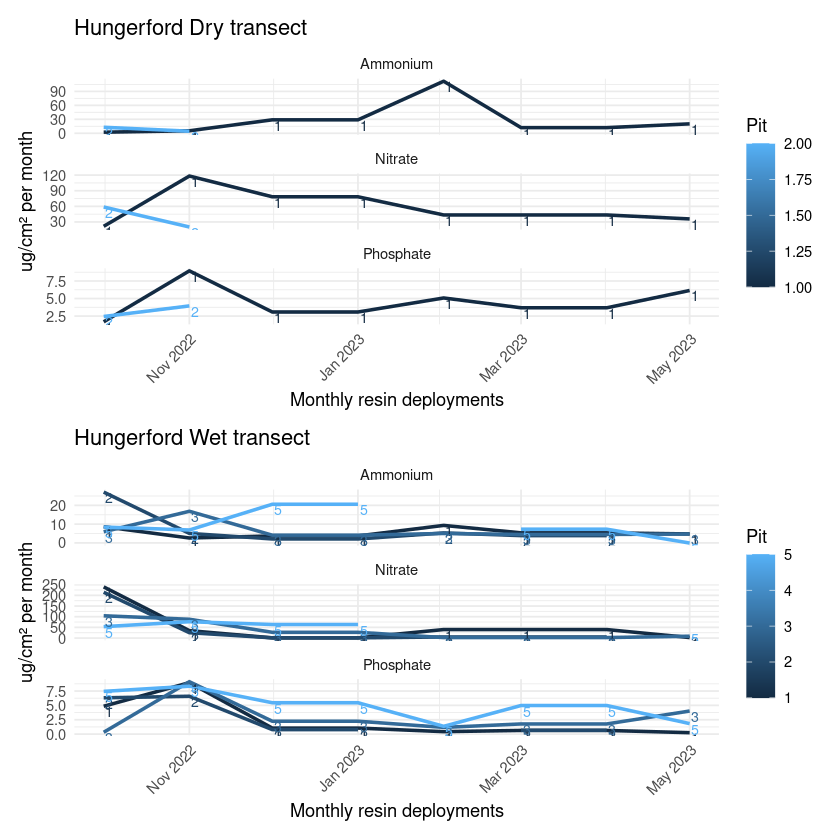

In [12]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"
#yield_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/"
yield_input_dir <- "soil-resins/"

################
# READ IN DATA #
################

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
# And get the month and year columns into a machine readable date format
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
resin_data_wy22 <- resin_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
resin_data_wy23 <- resin_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Read in event yield data
#yield_data <- read.csv(file.path(yield_input_dir, "Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv"))
wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_storm_NO3_yields.csv"))

###########################
# FUNCTION TO CREATE PLOTS #
###########################

create_nutrient_plots <- function(data, yield_data, site_name) {
  # Filter data for the specified site and wet/dry transects
  site_data <- data %>% filter(Site == site_name, Species %in% c("Ammonium", "Nitrate", "Phosphate"))
  
  # Define a function to create plots for a specific transect
  plot_transect <- function(transect_name) {
    ggplot(site_data %>% filter(Transect == transect_name), 
           aes(x = Date, y = ug_cm2_month, group = Pit, color = Pit)) +
      geom_line(size = 1) +
      geom_text(aes(label = Pit), hjust = -0.2, vjust = 1, size = 3) +
      scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
      labs(
        title = paste(site_name, transect_name, "transect", sep = " "),
        x = "Monthly resin deployments",
        y = "ug/cm² per month"
      ) +
      theme_minimal() +
      facet_wrap(~ Species, ncol = 1, scales = "free_y") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
  
  # Create plots for Wet and Dry transects
  wet_plot <- plot_transect("Wet")
  dry_plot <- plot_transect("Dry")
  
  # Combine vertically
  combined_plot <- dry_plot / wet_plot
  return(combined_plot)
}

##############################
# GENERATE AND SAVE THE PLOTS #
##############################

# Generate plots for Hungerford
hungerford_plot <- create_nutrient_plots(resin_data_wy23, wade_yield_data, "Hungerford")
ggsave("hungerford_nutrient_WY22.png", hungerford_plot, width = 5, height = 7, dpi = 300)

# Generate plots for Wade
#wade_plot <- create_nutrient_plots(resin_data_wy23, wade_yield_data, "Wade")
#ggsave("wade_nutrient_WY22.png", wade_plot, width = 5, height = 7, dpi = 300)

#print(hungerford_plot)
print(hungerford_plot)

In [5]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

################
# READ IN DATA #
################

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Define Water Year 2022
wy22_start <- as.Date("2022-10-01")
wy22_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
resin_data_wy22 <- resin_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Read in cumulative NO3 data
wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

###########################
# FUNCTION TO CREATE PLOTS #
###########################

create_nutrient_plots <- function(data, yield_data, site_name) {
  # Filter data for the specified site and wet/dry transects
  site_data <- data %>% filter(Site == site_name, Species %in% c("Ammonium", "Nitrate", "Phosphate"))
  
  # Define a function to create plots for a specific transect
  plot_transect <- function(transect_name) {
    ggplot(site_data %>% filter(Transect == transect_name), 
           aes(x = Date, y = ug_cm2_month, group = Pit, color = Pit)) +
      geom_line(size = 1) +
      geom_text(aes(label = Pit), hjust = -0.2, vjust = 1, size = 3) +
      scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
      labs(
        title = paste(site_name, transect_name, "transect", sep = " "),
        x = "Monthly resin deployments",
        y = "ug/cm² per month"
      ) +
      theme_minimal() +
      facet_wrap(~ Species, ncol = 1, scales = "free_y") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
  
  #cumulative_no3_plot <- ggplot(yield_data, aes(x = Date, y = cumulative.NO3.mm)) +
  #geom_step(color = "darkgreen", size = 1) +
  #labs(
    #title = paste(site_name, "Cumulative NO3", sep = " "),
    #x = NULL,
    #y = "Cumulative NO3 (mm)"
  #) +
  #theme_minimal() +
  #scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  #theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  # Create plots for Wet and Dry transects
  wet_plot <- plot_transect("Wet")
  dry_plot <- plot_transect("Dry")
  
  # Combine vertically: Cumulative NO3 + Dry + Wet
  combined_plot <- cumulative_no3_plot / dry_plot / wet_plot
  return(combined_plot)
}

##############################
# GENERATE AND SAVE THE PLOTS #
##############################

# Generate plots for Wade
wade_plot <- create_nutrient_plots(resin_data_wy22, wade_yield_data, "Wade")
ggsave("wade_nutrient_WY22_with_cumulative_NO3.png", wade_plot, width = 5, height = 9, dpi = 300)

# Print plot
print(wade_plot)

ERROR: Error in create_nutrient_plots(resin_data_wy22, wade_yield_data, "Wade"): object 'cumulative_no3_plot' not found


In [4]:
cumulative_no3_plot <- ggplot(wade_yield_data, aes(x = Date, y = cumulative.NO3.mm)) +
  geom_point(color = "darkgreen", size = 3) +
  labs(
    title = paste(site_name, "Cumulative NO3", sep = " "),
    x = NULL,
    y = "Cumulative NO3 (mm)"
  ) +
  theme_minimal() +
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ERROR: Error in paste(site_name, "Cumulative NO3", sep = " "): object 'site_name' not found


In [6]:
resin_data_wy22

Site,Transect,Pit,Species,Month,ug_cm2_month,Year,Date
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<date>
Hungerford,Dry,1,Ammonium,October,2.31,2022,2022-10-01
Hungerford,Dry,1,Ammonium,November,5.38,2022,2022-11-01
Hungerford,Dry,1,Ammonium,December,28.89,2022,2022-12-01
Hungerford,Dry,1,Ammonium,January,28.89,2023,2023-01-01
Hungerford,Dry,1,Ammonium,February,111.89,2023,2023-02-01
Hungerford,Dry,1,Ammonium,March,12.12,2023,2023-03-01
Hungerford,Dry,1,Ammonium,April,12.12,2023,2023-04-01
Hungerford,Dry,1,Ammonium,May,20.23,2023,2023-05-01
Hungerford,Dry,1,Nitrate,October,21.67,2022,2022-10-01
